# Assignment 2

In [1]:
%load_ext autoreload
%autoreload

In [2]:
import gym
import numpy as np
from control_algos import *
import matplotlib.pyplot as plt

We can set up the environment and set the experiment parameters.

In [3]:
env = gym.make("Taxi-v2")

num_runs = 10
num_segments = 5
num_episodes = 5

Define a function to run our experiments...

In [4]:
def run_experiment(num_runs, num_segments,num_episodes,env, controller, learning_rate, temp):
    # Hard coding discount factor for experiment
    algorithm = controller(0.9,env.observation_space.n, env.action_space.n,  temp, learning_rate)
    train_returns = 0
    test_returns = 0
    for run in range(num_runs):
        for segment in range(num_segments):
            for training_episode in range(num_episodes):
                # Sample S,A to start episode
                s = env.reset()
                a = algorithm.sample_action(s)
                done = False
                while not done:
                    observation, reward, done, _ = env.step(a)
                    next_a = algorithm.sample_action(s) 
                    algorithm.backup_state_action_values(s,a, reward, observation, next_a) 
                    if segment == num_segments - 1:
                        train_returns+=reward # No discounting for now...
                    s, a = observation, next_a
            # Run a test episode
            s = env.reset()
            a = algorithm.optimal_policy(s)
            done = False
            while not done:
                observation, reward, done, _ = env.step(a)
                next_a = algorithm.optimal_policy(s)
                if segment == num_segments - 1:
                    test_returns+=reward            
                s, a = observation, next_a
    return train_returns/(num_runs*num_episodes), test_returns/num_runs

### Hyper-parameter initialization

In [5]:
lr = [0.01,0.1,0.5]
temperatures = [0.1,0.5,1]
algos = [Sarsa, QLearning, ExpectedSarsa]

params = [(a,l,t) for l in lr for t in temperatures for a in algos]

###  Run experiments and store results

In [6]:
train_results_dict = {}
test_results_dict = {}
for p in params:
    train_results, test_results = run_experiment(num_runs, num_segments, num_episodes,env,*p)
    train_results_dict[p], test_results_dict[p] = train_results, test_results

In [7]:
# Re-format results for convenient plotting

train_algo_results = [{},{},{}] #Goes sarsa, qlearning, expectedsarsa
test_algo_results = [{},{},{}]
for i in range(len(algos)):
    for t in temperatures:
        train_algo_results[i][t] = []
        test_algo_results[i][t] = []
        for l in lr:
            train_algo_results[i][t].append(train_results_dict[(algos[i],l,t)])
            test_algo_results[i][t].append(test_results_dict[(algos[i],l,t)])

### Plot figures from training

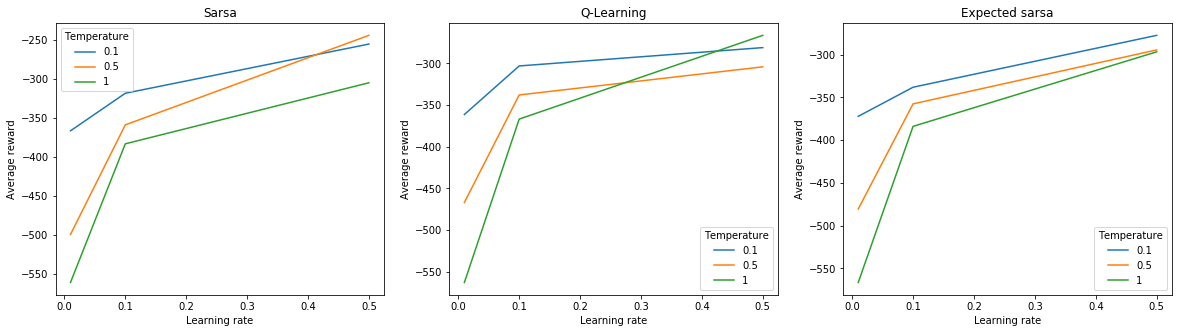

In [8]:
title_map = {0:'Sarsa', 1: 'Q-Learning', 2:'Expected sarsa'}
fig, axes  = plt.subplots(1,3,figsize=(20,5))
for i in range(len(algos)):
    ax = axes[i]
    for t in temperatures:
        ax.set_title(title_map[i])
        ax.plot(lr, train_algo_results[i][t])
        ax.legend([0.1,0.5,1], title='Temperature')
        ax.set_xlabel('Learning rate')
        ax.set_ylabel('Average reward')

### Plot figures from testing

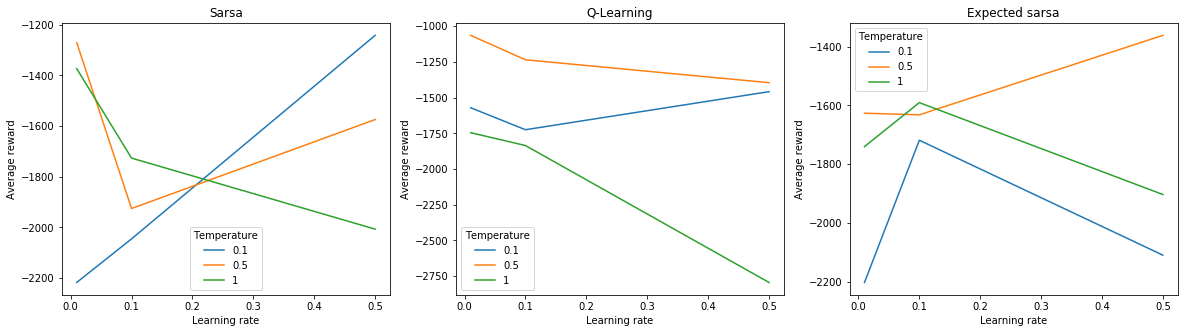

In [9]:
fig, axes  = plt.subplots(1,3,figsize=(20,5))
for i in range(len(algos)):
    ax = axes[i]
    for t in temperatures:
        ax.set_title(title_map[i])
        ax.plot(lr, test_algo_results[i][t])
        ax.legend([0.1,0.5,1], title='Temperature')
        ax.set_xlabel('Learning rate')
        ax.set_ylabel('Average reward')

### Learning Curves for best parameters
### TODO